In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [40]:
# data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/new_concatenated_data_7_theta.csv')
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')


In [41]:
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

input_train_scaled = scaler1.fit_transform(input_train)
output_train_scaled = scaler1.transform(output_train)

input_train_scaled = input_train_scaled.reshape((input_train_scaled.shape[0], 1, input_train_scaled.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(input_train_scaled, output_train_scaled, test_size=0.15, random_state=42)


indices = np.arange(input_train.shape[0])

X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train_scaled, output_train_scaled, indices, test_size=0.30, random_state=42)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

model1.compile(loss='mean_squared_error', optimizer='adam')

early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


start_time_training = time.time()
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()




Epoch 1/700
195/195 [==============================] - 2s 3ms/step - loss: 0.2481 - val_loss: 0.0025
Epoch 2/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 6.1146e-04
Epoch 3/700
195/195 [==============================] - 0s 2ms/step - loss: 4.8959e-04 - val_loss: 3.8139e-04
Epoch 4/700
195/195 [==============================] - 1s 3ms/step - loss: 3.4807e-04 - val_loss: 2.9538e-04
Epoch 5/700
195/195 [==============================] - 1s 4ms/step - loss: 2.7558e-04 - val_loss: 2.2339e-04
Epoch 6/700
195/195 [==============================] - 1s 4ms/step - loss: 2.1455e-04 - val_loss: 1.9166e-04
Epoch 7/700
195/195 [==============================] - 1s 3ms/step - loss: 1.7719e-04 - val_loss: 1.5196e-04
Epoch 8/700
195/195 [==============================] - 0s 2ms/step - loss: 1.5433e-04 - val_loss: 1.3490e-04
Epoch 9/700
195/195 [==============================] - 0s 2ms/step - loss: 1.3887e-04 - val_loss: 1.2176e-04
Epoch 10/700
195/195 [=========

195/195 [==============================] - 0s 2ms/step - loss: 5.8061e-05 - val_loss: 5.9668e-05
Epoch 150/700
195/195 [==============================] - 0s 2ms/step - loss: 6.5192e-05 - val_loss: 7.1093e-05
Epoch 151/700
195/195 [==============================] - 0s 2ms/step - loss: 5.7622e-05 - val_loss: 4.7719e-05
Epoch 152/700
195/195 [==============================] - 0s 2ms/step - loss: 6.5113e-05 - val_loss: 4.6246e-05
Epoch 153/700
195/195 [==============================] - 0s 2ms/step - loss: 5.3417e-05 - val_loss: 5.3521e-05
Epoch 154/700
195/195 [==============================] - 1s 3ms/step - loss: 5.5010e-05 - val_loss: 6.8095e-05
Epoch 155/700
195/195 [==============================] - 0s 2ms/step - loss: 5.6333e-05 - val_loss: 4.4501e-05
Epoch 156/700
195/195 [==============================] - 0s 2ms/step - loss: 5.8279e-05 - val_loss: 4.5207e-05
Epoch 157/700
195/195 [==============================] - 0s 2ms/step - loss: 5.3733e-05 - val_loss: 4.4350e-05
Epoch 158/700
1

In [42]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 84.08 seconds
Inference Time: 0.3493 seconds per sample


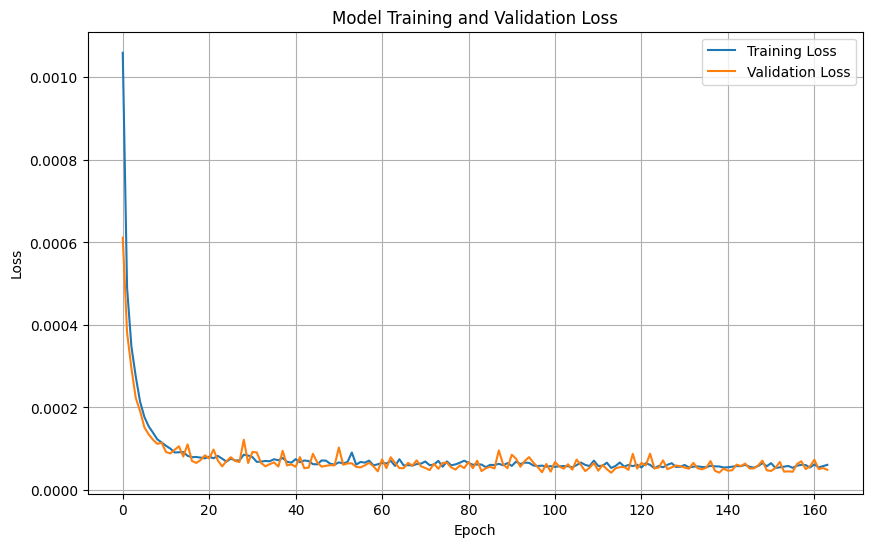

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('Model Training and Validation Loss.png',format='png')

plt.show()


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.3880895734660916e-05
Mean Absolute Error: 0.004170019921457021
R-squared: 0.9999551331964814


In [45]:
predictions_inverse_scaled = scaler1.inverse_transform(predictions)
predictions_df = pd.DataFrame(predictions_inverse_scaled)
predictions_df


,0,1,2
0,-39.208241,102.402954,2.719928
1,-41.767277,111.827141,2.962445
2,-26.103617,120.541870,4.748827
3,35.292927,132.831787,0.372139
4,-17.151585,111.749458,4.951581
...,...,...,...
2962,27.293566,138.719543,0.570191
2963,-26.622334,121.181503,4.734464
2964,40.551441,113.833580,6.142479
2965,-34.689289,113.055573,1.708603


In [46]:


predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']


In [47]:
# bead_x = data.loc[test_indices, 'bead_x'].values
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values


lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

,theta,measured_y,measured_z,traps_y,traps_z,reference_y,reference_z
0,2.719928,-39.208241,102.402954,-43.858305,103.682749,-43.841686,103.360943
1,2.962445,-41.767277,111.827141,-43.110879,112.076170,-42.775556,111.927768
2,4.748827,-26.103617,120.541870,-27.302437,117.937062,-28.508862,117.895477
3,0.372139,35.292927,132.831787,34.222157,133.354134,35.885862,133.557822
4,4.951581,-17.151585,111.749458,-17.635968,109.918091,-18.464252,109.732995
...,...,...,...,...,...,...,...
2962,0.570191,27.293566,138.719543,25.845103,138.351896,27.183214,138.653718
2963,4.734464,-26.622334,121.181503,-27.901015,118.520598,-29.128234,118.490183
2964,6.142479,40.551441,113.833580,39.792526,113.610067,41.502822,113.538425
2965,1.708603,-34.689289,113.055573,-33.884107,113.754279,-35.293491,113.652881


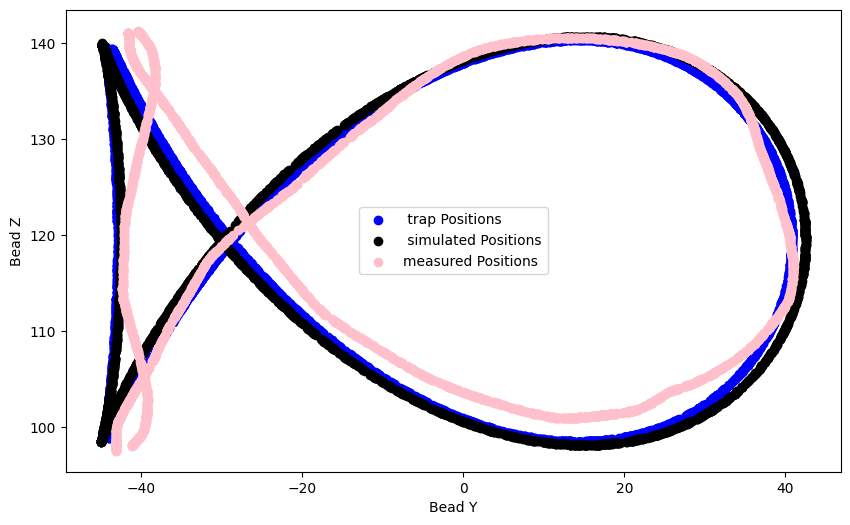

In [48]:

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label=' trap Positions', lw=1)
plt.scatter(lookup_table['reference_y'], lookup_table['reference_z'], color='black', label=' simulated Positions')
plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

In [49]:

# # Plot the predictions vs reference positions
# plt.figure(figsize=(10, 6))
# plt.scatter(data['traps_y'], data['traps_z'], color='blue', label=' trap Positions', lw=1)
# plt.scatter(data['bead_y'], data['bead_z'], color='black', label=' simulated Positions')
# plt.scatter(data['measured_y'], data['measured_z'], color='pink', label='measured Positions')

# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [50]:
# theta_lookup=lookup_table.sort_values(by='theta')['theta'].reset_index(drop=True)


In [51]:
# lookup_table = lookup_table.sort_values(by='theta').reset_index(drop=True)
# lookup_table

In [52]:
# change of logic - using theta static and static reference positions calculations

In [53]:
# theta_pred = predictions_df.sort_values(by='theta')['theta']
# theta_lookup=predictions_df['theta']
# theta_lookup

In [54]:
# h_center = tf.constant(0.1194, dtype=tf.float32)
# q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
# q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
# bead_y = q_y*42.2
# bead_z = (q_z + h_center)*42 +114.40

# reference_positions = tf.concat([tf.expand_dims(theta_lookup, axis=1), tf.expand_dims(bead_y, axis=1), tf.expand_dims(bead_z, axis=1)], axis=1)
# reference_positions

In [55]:
# #checking the range of values for all parameters involved
# plt.figure(figsize=(10, 6))
# # plt.scatter(reference_positions_final[:, 1], reference_positions_final[:, 2], color='blue', label='simulation', s=1)
# plt.scatter(input_nn2_scaled[:, 0], input_nn2_scaled[:, 1], color='pink', label='measured positions scaled', lw=1)
# plt.scatter(output_nn2_scaled[:, 0], output_nn2_scaled[:, 1], color='green', label='traps scaled', s=1)


# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [56]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract and scale input and output data
# input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
# output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values


input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values


input_scaler = StandardScaler()
output_scaler = StandardScaler()

input_nn2_scaled = input_scaler.fit_transform(input_nn2)
output_nn2_scaled = output_scaler.fit_transform(output_nn2)

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2_scaled.reshape((input_nn2_scaled.shape[0], 1, input_nn2_scaled.shape[1]))
output_scaled_nn2 = output_nn2_scaled


In [57]:


# Split the data into training and testing sets
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)

    # Extract true theta from y_true
    theta_lookup = y_true_nn2[:, -1]  # Assuming theta is the last column in y_true

    # Calculate reference_positions_final based on theta_lookup
    h_center = tf.constant(0.1194, dtype=tf.float32)
    q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
    q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
    bead_y = q_y #* 42.2
    bead_z = (q_z + h_center) #* 42 + 114.40

    reference_positions_final = tf.concat([
        tf.expand_dims(bead_y, axis=1),
        tf.expand_dims(bead_z, axis=1),
        tf.expand_dims(theta_lookup, axis=1)
    ], axis=1)

    reference_positions_final_scaled = (reference_positions_final - tf.convert_to_tensor(input_scaler.mean_, dtype=tf.float32)) / tf.convert_to_tensor(input_scaler.scale_, dtype=tf.float32)

    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - reference_positions_final_scaled), axis=1))  # Only consider y and z

    return deviation

# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model2.compile(loss=custom_cost_function, optimizer='adam')


start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()


Epoch 1/400
71/71 [==============================] - 3s 9ms/step - loss: 7.8830 - val_loss: 2.9240
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 1.0134 - val_loss: 0.3655
Epoch 3/400
71/71 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.1398
Epoch 4/400
71/71 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.0711
Epoch 5/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0845 - val_loss: 0.1143
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0773 - val_loss: 0.0632
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0645 - val_loss: 0.0651
Epoch 8/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0639 - val_loss: 0.0495
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0571 - val_loss: 0.0553
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.0599
Epoch 11/

71/71 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.0584
Epoch 84/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0322
Epoch 85/400
71/71 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.0269
Epoch 86/400
14/14 [==============================] - 0s 1ms/step


In [59]:
y_test_nn2.shape

(446, 5)

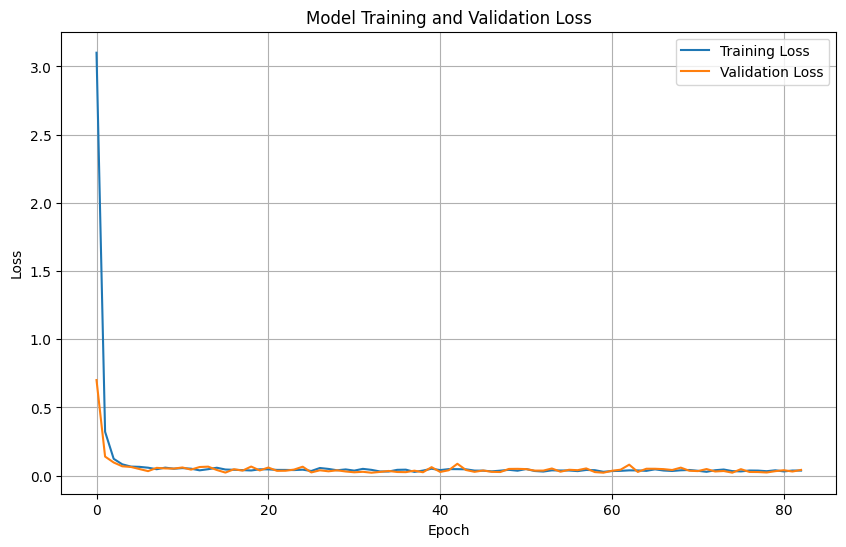

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('Model Training and Validation Loss.png',format='png')

plt.show()


In [12]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 23.16 seconds
Inference Time: 0.1661 seconds per sample


Predictions: [[ 1.1814528e+00 -8.0887632e+00  1.8265098e-04  4.5796615e-01
  -9.7635144e-01]
 [ 1.4538815e+00 -8.1514626e+00 -2.3381199e-01  3.0538404e-01
  -1.7548018e+00]
 [ 1.3866913e+00 -8.1152277e+00 -1.2996989e-01  3.2693261e-01
  -1.5099385e+00]
 [ 1.3458886e+00 -8.0851889e+00 -1.3286012e-01  3.6232081e-01
  -1.3975470e+00]
 [ 1.2373664e+00 -8.0651264e+00 -3.2424837e-02  3.8717043e-01
  -1.1355226e+00]]
Actual Outputs: [[ 1.57789608 -0.51059956  1.58378476 -0.50768971  1.59280826]
 [-0.13985694  0.75797932 -0.15925353  0.7587002  -0.917239  ]
 [-1.02888901 -0.69500261 -0.99214515 -0.69624794 -0.0803405 ]
 [-1.05020281  1.12584193 -1.02248406  1.12847948  0.28814467]
 [ 0.29510042 -1.26355898  0.28329451 -1.26252224  1.13446563]]


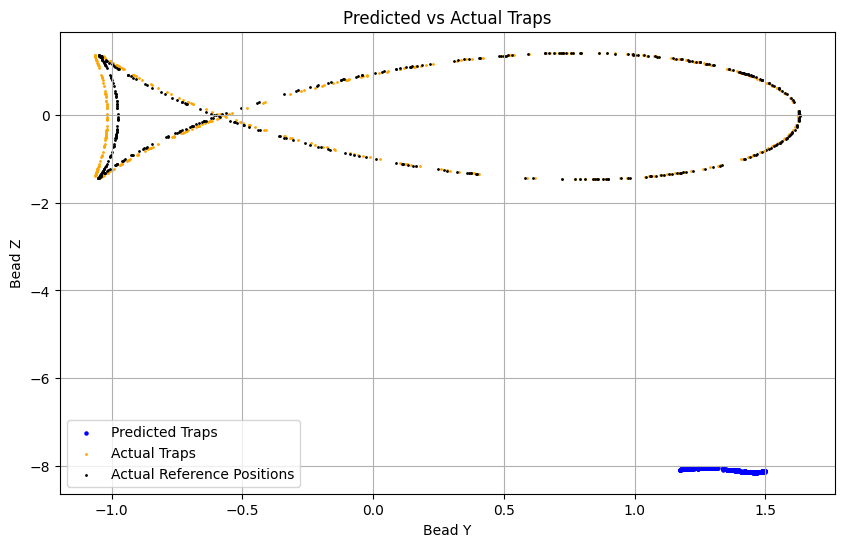

In [13]:
# Predict on the test set
# predictions_nn2 = model2.predict(X_test)

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Traps', s=5)
plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 30.92168456695859
Mean Absolute Error: 4.731110843080641
R-squared: -30.048303331562295


In [63]:
y_test_nn2.shape

(446, 5)

In [64]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

14/14 [==============================] - 0s 2ms/step


array([[ 0.28511572, -8.314407  , -0.75143564],
       [ 0.3173827 , -8.365364  , -2.0706325 ],
       [ 0.34278384, -8.34231   , -1.6312242 ],
       ...,
       [ 0.33434668, -8.308931  , -1.3049302 ],
       [ 0.28607705, -8.306764  , -2.4020755 ],
       [ 0.2843768 , -8.300871  , -0.76169467]], dtype=float32)

In [65]:
final_predictions.shape

(446, 3)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 35.98170531724498
Mean Absolute Error: 4.668881142546498
R-squared: -48750.67323134103


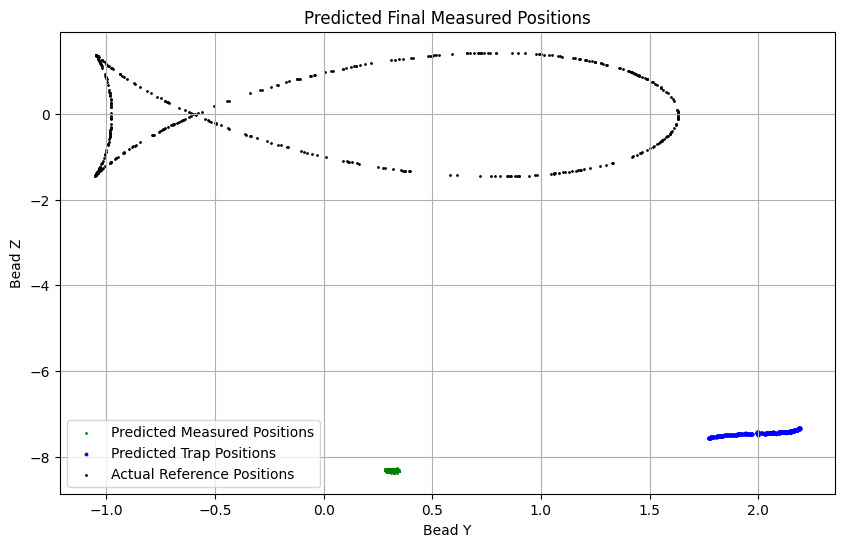

In [67]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictions[:, 0], final_predictions[:, 1], color='green', label='Predicted Measured Positions',s=1)
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

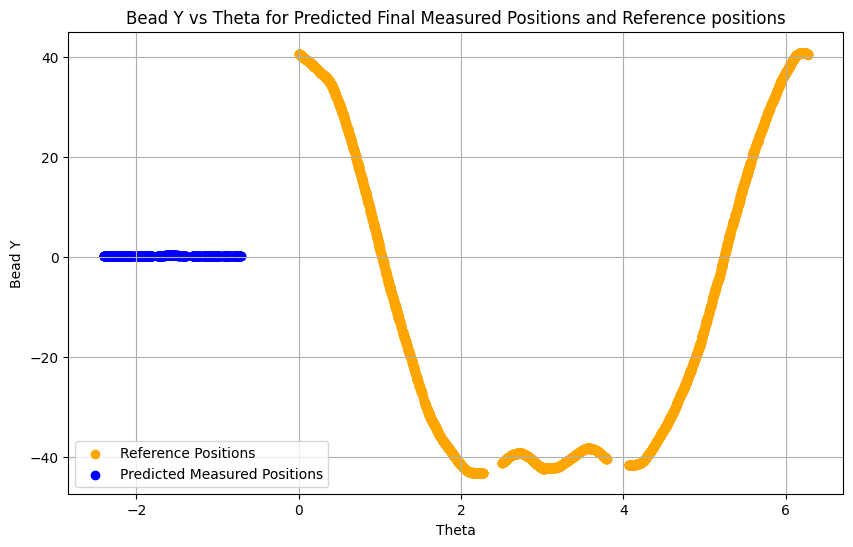

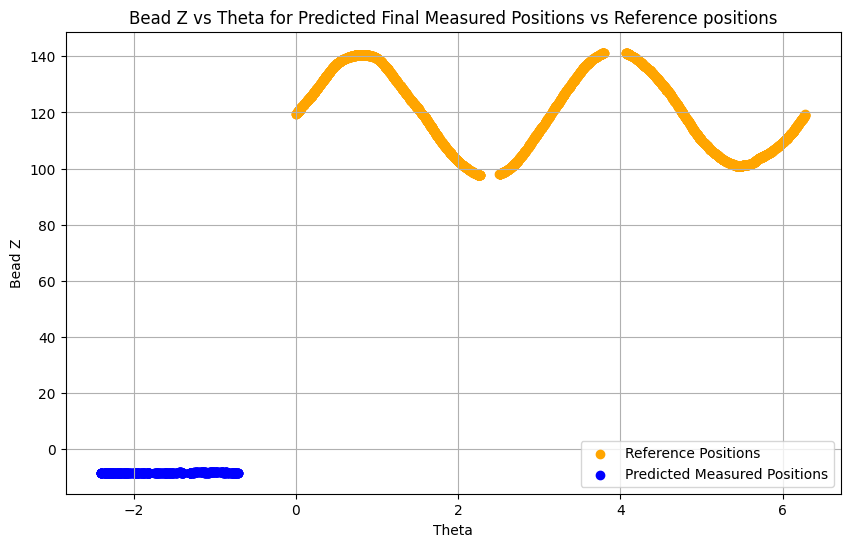

In [68]:

# Convert final predictions to DataFrame and add theta
final_predictions_df = pd.DataFrame(final_predictions, columns=['measured_y', 'measured_z', 'theta'])

# Sort final predictions by theta
final_predictions_sorted = final_predictions_df.sort_values(by=['theta','measured_y','measured_z'], ascending=True)

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_y'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.title('Bead Y vs Theta for Predicted Final Measured Positions and Reference positions')
plt.savefig('BeadYtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.title('Bead Z vs Theta for Predicted Final Measured Positions vs Reference positions')
plt.savefig('BeadZtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

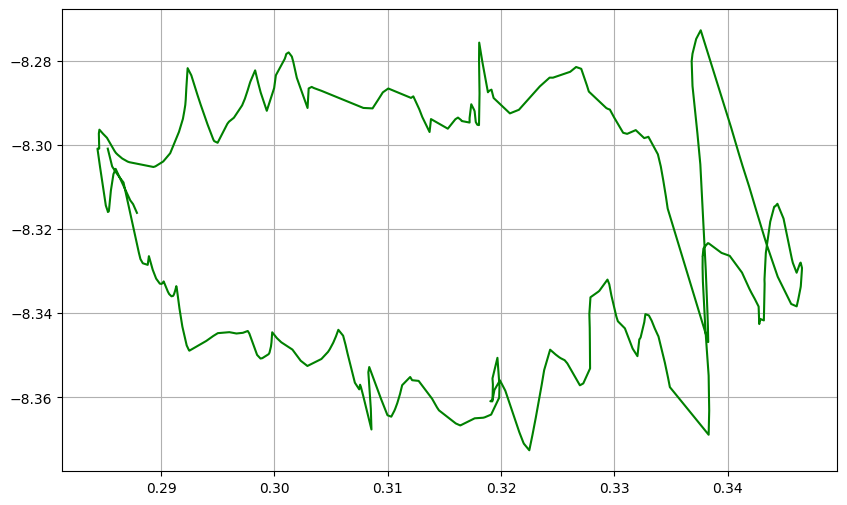

In [69]:
plt.figure(figsize=(10, 6))

plt.plot(final_predictions_sorted['measured_y'], final_predictions_sorted['measured_z'], color='green', label='Predicted measured Positions')
plt.grid()

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 30.92168456695859
Mean Absolute Error: 4.731110843080641
R-squared: -30.048303331562295


In [ ]:
# model2.save('model2_static_theta.keras')

In [38]:
afterthetascaled = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('afterthetascaled.npy', afterthetascaled)